In [1]:
import os
import sys
import warnings
warnings.filterwarnings('ignore')
# evaluate an xgboost regression model on the housing dataset
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score,cross_validate,KFold
from xgboost import XGBRegressor,XGBClassifier
# libraries for visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style="white")
# library to save the money
import joblib

In [5]:
def get_na(df):
    qsna=df.shape[0]-df.isnull().sum(axis=0)
    qna=df.isnull().sum(axis=0)
    ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)
    aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
    na=pd.DataFrame(data=aux)
    return na.sort_values(by='Na en %',ascending=False)

In [2]:
directory_path = os.path.abspath(os.path.join('..'))
if directory_path not in sys.path:
    sys.path.append(directory_path)
os.chdir(directory_path)
os.getcwd()

'/Users/iairlinker/Documents/repos/flight_delays_challenge'

In [6]:
# Loading pre-processed dataset
path = os.getcwd() + '/data/interim/model_data.csv' 
df = pd.read_csv(path, sep=',')
X = df.copy()
y = X.atraso_15
X.drop('atraso_15', axis=1, inplace=True)
get_na(X)

,datos sin NAs en q,Na en q,Na en %
onehotencoder__x0_1,68206,0,0.0
onehotencoder__x1_EGLL,68206,0,0.0
onehotencoder__x2_TPU,68206,0,0.0
onehotencoder__x2_UAL,68206,0,0.0
onehotencoder__x3_N,68206,0,0.0
...,...,...,...
onehotencoder__x1_SCTE,68206,0,0.0
onehotencoder__x1_SCVD,68206,0,0.0
onehotencoder__x1_SEGU,68206,0,0.0
onehotencoder__x1_SEQM,68206,0,0.0


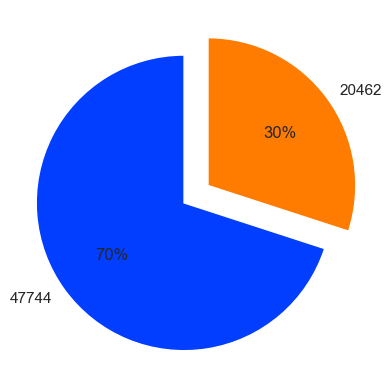

In [7]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
#define data
data = [X_train.shape[0],X_test.shape[0] ]
labels = [data[0], data[1]]
#define Seaborn color palette to use
colors = sns.color_palette('bright')[0:2]
#create pie chart
plt.pie(data, labels = labels, colors = colors,startangle=90, 
        autopct='%1.f%%',explode=(0.1,0.1))
plt.show()